In [12]:
#https://www.simplilearn.com/tutorials/deep-learning-tutorial/convolutional-neural-network

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create a sequential model
model = Sequential()

# Add a convolutional layer with 32 filters, a 3x3 kernel size, and a ReLU activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a convolutional layer with 64 filters, a 3x3 kernel size, and a ReLU activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Flatten the output from the previous layer
model.add(Flatten())

# Add a fully connected layer with 128 units and a ReLU activation function
model.add(Dense(128, activation='relu'))

# Add an output layer with 10 units and a softmax activation function
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/5
1875/1875 [==============================] - 56s 29ms/step - loss: 0.1991 - accuracy: 0.9386
Epoch 2/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0719 - accuracy: 0.9779
Epoch 3/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0514 - accuracy: 0.9837
Epoch 4/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0400 - accuracy: 0.9873
Epoch 5/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0308 - accuracy: 0.9901
Test loss: 0.048140689730644226
Test accuracy: 0.9869999885559082


In [13]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [14]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 4s 14ms/step - loss: 0.2745 - val_loss: 0.1864
Epoch 2/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1690 - val_loss: 0.1526
Epoch 3/50
235/235 [==============================] - 6s 23ms/step - loss: 0.1437 - val_loss: 0.1335
Epoch 4/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1287 - val_loss: 0.1216
Epoch 5/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1184 - val_loss: 0.1129
Epoch 6/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1111 - val_loss: 0.1070
Epoch 7/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1060 - val_loss: 0.1027
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1022 - val_loss: 0.0994
Epoch 9/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0993 - val_loss: 0.0968
Epoch 10/50
235/235 [==============================] - 3s 11ms/st

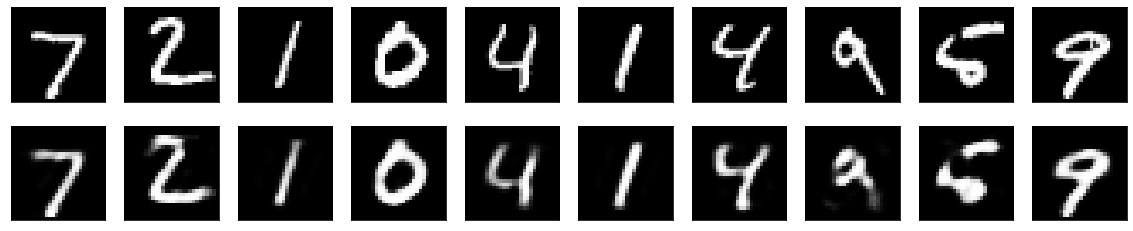

In [15]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()